In [1]:
import pandas as pd
import numpy as np
import unicodedata
import re
import nltk
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/Sinhala_news_articles.csv")


In [3]:
data.tail()

,Title,Label
26415,එක්දින^ 20 -20 ශ්‍රී ලංකා සංචිතය නම් කෙරේ.,Sport
26416,ආබාධ^ ක්‍රීඩකයන් 04 දෙනෙකුට හෙට තරගය අහිමි කරයි.,Sport
26417,ශ්‍රී ලංකා - ඕස්ට්‍රේලියා 3 වන තරගය හෙට.,Sport
26418,බංග්ලාදේශය පාකිස්ථානයට ?,Sport
26419,නවතම ක්‍රිකට් ශ්‍රේණිගත කිරීම්.,Sport


## Data Preprocessing

In [8]:
data.shape

(26420, 2)

In [10]:
data.duplicated().sum()

796

In [12]:
data.isnull().sum()

Title    0
Label    0
dtype: int64

In [14]:
def lineBreakReplace(text):
    return text.replace("\r\n", " ")

In [16]:
data['Title'] =data.apply(lambda x: lineBreakReplace(x.Title), axis=1)

In [18]:
def removeEscapSequences(text):
    return "".join(ch for ch in text if unicodedata.category(ch)[0]!="C")

In [20]:
data['Title'] =data.apply(lambda x: removeEscapSequences(x.Title), axis=1)

In [22]:
def remove_digits(text):
    return ''.join([i for i in text if not i.isdigit()])
data['Title'] =data.apply(lambda x: remove_digits(x.Title), axis=1)

In [24]:
data['Title'] =data.apply(lambda x: removeEscapSequences(x.Title), axis=1)
data.head()

,Title,Label
0,කොරෝනා වැලඳුණු ට්රම්ප් අද ජන රැලියක,International
1,ආර්ථික විද්යාව පිළිබඳ නොබෙල් ත්යාගය ඇමරිකානුවන...,International
2,ඉන්දියාවේ කොරෝනා ආසාදිතයන් ලක්ෂය ඉක්මවයි,International
3,කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...,International
4,නේපාල සංචාරක ඇමතිට කොරෝනා,International


In [25]:
def removeHtmlTags(text):
    p = re.compile(r'<.*?>')
    return p.sub('', text)

In [28]:

data['Title'] = data.apply(lambda x: removeHtmlTags(x.Title), axis=1)

In [30]:
data.head()

,Title,Label
0,කොරෝනා වැලඳුණු ට්රම්ප් අද ජන රැලියක,International
1,ආර්ථික විද්යාව පිළිබඳ නොබෙල් ත්යාගය ඇමරිකානුවන...,International
2,ඉන්දියාවේ කොරෝනා ආසාදිතයන් ලක්ෂය ඉක්මවයි,International
3,කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...,International
4,නේපාල සංචාරක ඇමතිට කොරෝනා,International


In [32]:
def removeSpecialCharacters(sentence,keep_apostrophes=True):
    sentence = sentence.strip()
    if keep_apostrophes:
        PATTERN = r'[?|$|&|*|%|@|(|)|~]'
        filtered_sentence = re.sub(PATTERN, r'', sentence)
        return filtered_sentence
    return sentence

In [34]:
def replace_full_stops(sentence):
    return sentence.replace("."," ")

In [36]:
data['Title'] = data.apply(lambda x: removeSpecialCharacters(x.Title), axis=1)
data['Title'] = data.apply(lambda x: replace_full_stops(x.Title), axis=1)

In [37]:
def remove_english_letters(sentence):
    non_english_sentence = re.sub(r'[a-zA-Z]', '', sentence)
    return non_english_sentence

In [40]:
data['Title']  = data['Title'] .apply(lambda x: remove_english_letters(x))

In [42]:
data

,Title,Label
0,කොරෝනා වැලඳුණු ට්රම්ප් අද ජන රැලියක,International
1,ආර්ථික විද්යාව පිළිබඳ නොබෙල් ත්යාගය ඇමරිකානුවන...,International
2,ඉන්දියාවේ කොරෝනා ආසාදිතයන් ලක්ෂය ඉක්මවයි,International
3,කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...,International
4,නේපාල සංචාරක ඇමතිට කොරෝනා,International
...,...,...
26415,එක්දින^ - ශ්රී ලංකා සංචිතය නම් කෙරේ,Sport
26416,ආබාධ^ ක්රීඩකයන් දෙනෙකුට හෙට තරගය අහිමි කරයි,Sport
26417,ශ්රී ලංකා - ඕස්ට්රේලියා වන තරගය හෙට,Sport
26418,බංග්ලාදේශය පාකිස්ථානයට,Sport


In [44]:
data["Title"] = data['Title'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [46]:
import re
import string

In [48]:
string.punctuation

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["Title"] = data["Title"].apply(remove_punctuations)

In [50]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [52]:
data["Title"] = data["Title"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
data

,Title,Label
0,කොරෝනා වැලඳුණු ට්රම්ප් අද ජන රැලියක,International
1,ආර්ථික විද්යාව පිළිබඳ නොබෙල් ත්යාගය ඇමරිකානුවන...,International
2,ඉන්දියාවේ කොරෝනා ආසාදිතයන් ලක්ෂය ඉක්මවයි,International
3,කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...,International
4,නේපාල සංචාරක ඇමතිට කොරෝනා,International
...,...,...
26415,එක්දින ශ්රී ලංකා සංචිතය නම් කෙරේ,Sport
26416,ආබාධ ක්රීඩකයන් දෙනෙකුට හෙට තරගය අහිමි කරයි,Sport
26417,ශ්රී ලංකා ඕස්ට්රේලියා වන තරගය හෙට,Sport
26418,බංග්ලාදේශය පාකිස්ථානයට,Sport


## Building vocobulary


In [54]:
from collections import Counter
vocab = Counter()

In [55]:
for sentence in data['Title']:
    vocab.update(sentence.split())

In [56]:
len(vocab)


20696

In [57]:
data.shape

(26420, 2)

In [58]:
tokens = [key for key in vocab if vocab[key] > 10]

In [59]:
len(tokens)

2421

In [67]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [101]:
X = data['Title']
Y = data['Label']

In [102]:
!pip install scikit-learn

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [104]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [105]:
vectorized_x_train = vectorizer(X_train, tokens)

In [106]:
vectorized_x_test = vectorizer(X_test, tokens)


In [107]:
Y_train.value_counts()


Label
International    9587
Sport            7248
Business         4301
Name: count, dtype: int64

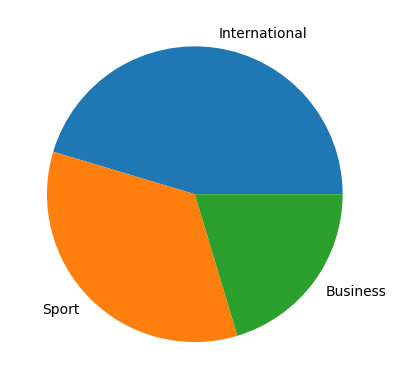

In [108]:
plt.pie(np.array([Y_train.value_counts()["International"], Y_train.value_counts()["Sport"], Y_train.value_counts()["Business"]]), labels=['International', 'Sport', 'Business'])
plt.show()

In [109]:
!pip install imbalanced-learn


In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, Y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)


(28956, 2421) (28956,)


In [80]:
y_train_smote.value_counts()

Label
Business         9652
Sport            9652
International    9652
Name: count, dtype: int64

In [ ]:
X_test

In [ ]:
plt.pie(np.array([y_train_smote.value_counts()["International"], y_train_smote.value_counts()["Sport"], y_train_smote.value_counts()["Business"]]), labels=['International', 'Sport', 'Business'])
plt.show()

In [120]:
vectorized_x_train_smote


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)  # or 'macro', 'micro'
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)
    print(f"Accuracy: {acc}, Precision: {pr}, Recall: {rec}, F1-score: {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)
    print(f"Validation Accuracy: {acc}, Precision: {pr}, Recall: {rec}, F1-score: {f1}")


In [85]:
## Logistic Regression

In [89]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Accuracy: 0.953, Precision: 0.953, Recall: 0.953, F1-score: 0.953
Validation Accuracy: 0.912, Precision: 0.914, Recall: 0.912, F1-score: 0.913


In [90]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Accuracy: 0.991, Precision: 0.991, Recall: 0.991, F1-score: 0.991
Validation Accuracy: 0.825, Precision: 0.833, Recall: 0.825, F1-score: 0.827


In [91]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)